## Heart Disease Risk Prediction: Logistic Regression Homework
    Introductory Context
    Heart disease is the world's leading cause of death, claiming approximately 18 million lives each year, as reported by the World Health Organization. Predictive models like logistic regression can enable early identification of at-risk patients by analyzing clinical features such as age, cholesterol, and blood pressure. This not only improves treatment outcomes but also optimizes resource allocation in healthcare settings. In this homework, you'll implement logistic regression on the Heart Disease Dataset—a real-world UCI repository collection of 303 patient records with 14 features and a binary target (1 for disease presence, 0 for absence). You'll train models, visualize boundaries, apply regularization, and explore deployment via Amazon SageMaker to mimic a production pipeline.

## Homework Instructions
Complete this in a Jupyter notebook, implementing functions from class theory (e.g., sigmoid, cost, GD). Use NumPy, Pandas, and Matplotlib—no scikit-learn for core training. Emphasize exploration: Tune parameters, interpret results, and document findings.

## Step 1: Load and Prepare the Dataset
Download from Kaggle: Kaggle is a popular online platform for data science enthusiasts, hosting datasets, competitions, and notebooks—think of it as GitHub for data and ML projects (free to join at kaggle.com). To access the Heart Disease Dataset, visit https://www.kaggle.com/datasets/neurocipher/heartdisease. Sign up/log in, click "Download" (or "Download API" if using CLI), and save the CSV file (e.g., heart.csv or similar—check the dataset page for exact filename).
Load into Pandas; binarize the target column (e.g., map to 1=disease presence, 0=absence).
EDA: Summarize stats, handle missing/outliers, plot class distribution.
Prep: 70/30 train/test split (stratified); normalize numerical features. Select ≥6 features (e.g., Age, Cholesterol, BP, Max HR, ST Depression, Vessels).
Reporting: Markdown summary of data insights/preprocessing (e.g., "Downloaded from Kaggle; 303 samples, ~55% disease rate").

## Step 2: Implement Basic Logistic Regression
Sigmoid, cost (binary cross-entropy), GD (gradients, updates; track costs).
Train on full train set (α~0.01, 1000+ iters). Plot cost vs. iterations.
Predict (threshold 0.5); evaluate acc/precision/recall/F1 on train/test.
Reporting: Cost plot + metrics table. Comment on convergence/interpretations (e.g., w coefficients).

## Step 3: Visualize Decision Boundaries
Select ≥3 feature pairs (e.g., Age-Cholesterol, BP-Max HR, ST Depression-Vessels).
For each: Subset to 2D, train model, plot boundary line + scatter (true labels).
Discuss separability/nonlinearity.
Reporting: ≥3 plots. Markdown: Insights per pair (e.g., "Clear divide at chol>250").

## Step 4: Repeat with Regularization
Add L2 to cost/gradients (λ/(2m)||w||²; dw += (λ/m)w).
Tune λ ([0, 0.001, 0.01, 0.1, 1]); retrain full model + pairs.
Re-plot costs/boundaries (one pair: unreg vs. reg). Re-eval metrics/||w||.
Reporting: λ-metrics table + plots. Markdown: "Optimal λ=[val] improves [metric] by [val]%."

## Step 5: Explore Deployment in Amazon SageMaker
Export best model (w/b as NumPy array).
In SageMaker (use free tier/Studio): Create notebook instance; upload/run your notebook for training. Explore docs to build/deploy a simple endpoint (e.g., via script: load data, train, save model; create inference handler for patient inputs → prob output).
Test: Invoke endpoint with sample (e.g., Age=60, Chol=300); capture response.
Self-Guided: Follow AWS tutorials (search "SageMaker logistic regression endpoint")—experiment with instance types, monitoring.
Reporting: Notebook section: High-level steps + sample output. Comment: "Deployment enables [e.g., real-time risk scoring]; latency [val]ms."

## Deliverables
Jupyter Notebook (heart_disease_lr_analysis.ipynb): End-to-end executable; markdown for steps, inline comments, all plots/tables. Final insights section.
README.md: Repo overview:
Exercise Summary: "Implements logistic regression for heart disease prediction: EDA, training/viz, reg, SageMaker deployment."
Dataset Description: "Kaggle Heart Disease (303 patients; features: Age 29-77, Chol 112-564 mg/dL, etc.; ~55% presence rate). Downloaded from https://www.kaggle.com/datasets/neurocipher/heartdisease."
Deployment Evidence: Describe process; embed ≥3 images (screenshots: training job status, endpoint config, inference response). "Model at [endpoint ARN]; tested input [Age=60, Chol=300] → Output: Prob=0.68 (high risk)."
GitHub Repo: Create public/private repo; include notebook, README.md, CSV, images. Share link in submission (e.g., "Repo: github.com/[user]/heart-disease-lr").
Submission and Evaluation
Submit: GitHub repo link via moodle.
Criteria (100 pts): EDA (10), Implementation (35), Viz/Analysis (20), Reg (15), Deployment/Repo (15), Clarity (5).

In [7]:
%pip install numpy matplotlib pandas

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.9 MB 6.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/9.9 MB 6.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.9 MB 1.9 MB/s eta 0:00:05
   --------- ------------------------------ 2.4/9.9 MB 2.7 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/9.9 MB 3.1 MB/s eta 0:00:03
   -------------------- ------------------- 5.0/9.9 MB 3.9 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.9 MB 4.3 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.9 MB 4.1 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.9 MB 3.9 MB/s eta 0:00:01
   -------------------------------- ------- 8.1/9.9 MB 3.8 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.9 MB 3.9 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.9 MB 3.8 MB/s eta 0:00:01
   ----------------

In [19]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [20]:
import pandas as pd

df = pd.read_csv("Heart_Disease_Prediction.csv")
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [21]:
df['Heart Disease'] = df['Heart Disease'].map({
    'Presence': 1,
    'Absence': 0
})



In [11]:

df['Heart Disease'].value_counts()


Heart Disease
0    150
1    120
Name: count, dtype: int64

In [12]:
df.shape
df.info()
df.describe()



<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


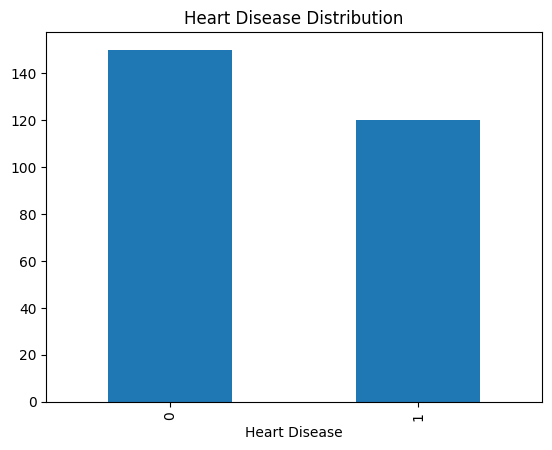

In [15]:
df['Heart Disease'] = df['Heart Disease'].map({
    'Presence': 1,
    'Absence': 0
})

df['Heart Disease'].value_counts()
df['Heart Disease'].value_counts().plot(kind='bar')
plt.title("Heart Disease Distribution")
plt.show()


## 3.3

variables escogidas


In [30]:
features = [
    'Age',
    'BP',
    'Cholesterol',
    'Max HR',
    'ST depression',
    'Number of vessels fluro'
]

X = df[features].values
y = df['Heart Disease'].values



## 3.4 Data Preprocessing

In [24]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

np.random.seed(42)
idx = np.random.permutation(len(X))
train_size = int(0.7 * len(X))

X_train = X[idx[:train_size]]
y_train = y[idx[:train_size]]
X_test = X[idx[train_size:]]
y_test = y[idx[train_size:]]



## 4. Logistic Regression Implementation from Scratch

## 4.1 Sigmoid Function

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


## 4.2 cost function

In [28]:
def compute_cost(X, y, w, b):
    m = len(y)
    h = sigmoid(X @ w + b)
    return -(1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))



## 4.3 Gradient Descent

In [34]:
def gradient_descent(X, y, w, b, lr, epochs):
    m = len(y)
    costs = []

    for _ in range(epochs):
        h = sigmoid(X @ w + b)
        dw = (1/m) * X.T @ (h - y)
        db = (1/m) * np.sum(h - y)

        w -= lr * dw
        b -= lr * db

        costs.append(compute_cost(X, y, w, b))

    return w, b, costs



## 4.4 training
    initialize the weights and we train the model

In [35]:

w = np.zeros(X_train.shape[1])
b = 0

w, b, costs = gradient_descent(
    X_train, y_train, w, b,
    lr=0.01, epochs=1000
)


## 4.5 
    convergence

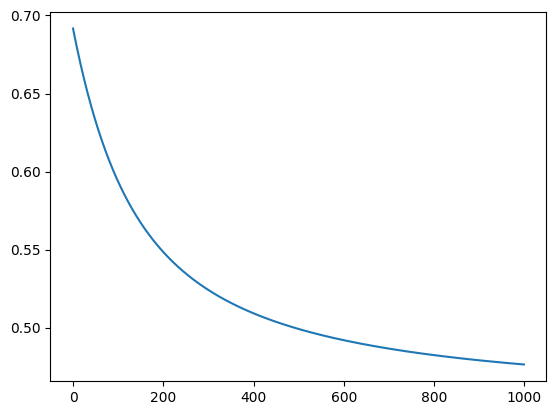

In [32]:
plt.plot(costs)
plt.show()


Curve interpretation:
Important pesos


## 4.6 evaluation

In [36]:
def predict(X, w, b):
    return (sigmoid(X @ w + b) >= 0.5).astype(int)


Accuracy

Precision

Recall

F1

Train vs test

## 5. Decision Boundaries